In [1]:
# %pip install plotly 
# %pip install -q dash dash_bootstrap_components jupyter_dash
# %python-m pip install --upgrade pip

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.figure_factory as ff 
from dash import dcc, Dash , html
import dash_bootstrap_components as dbc 
from jupyter_dash import JupyterDash
from dash.dependencies import Input , Output 

In [3]:
df = pd.read_csv('fastfood.csv')
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


# Preprocessing

## Null handling

In [4]:
df.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

##### 1- As we have columns like vit_a, vit_c, and calcuim has large number of nulls, which can not be handled using mean or mode, so we will remove the following columns:
* vit_a
* vit_c
* calcium
##### 2- We will handle nulls in fiber , and protein columns using:
* mean
* median

<br>Note: If we have categorical columns have number of nulls that could be handled, we can use mode as null replacement

In [5]:
df.drop(['vit_a' , 'vit_c' , 'calcium'] , axis= 1 , inplace= True)
df.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'salad'],
      dtype='object')

In [6]:
df['fiber'].fillna(df['fiber'].mean() , inplace= True )
df.isna().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        1
salad          0
dtype: int64

In [7]:
df['protein'].fillna(df['protein'].mean() , inplace = True )
df.isna().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
salad          0
dtype: int64

In [8]:
df['restaurant'].nunique() , df['item'].nunique()

(8, 505)

## Outliers handling
* Read more about handling outliers from this [article](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). 

In [9]:
numeric_cols = df.select_dtypes(include= 'number').columns
numeric_cols , numeric_cols.shape

(Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
        'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein'],
       dtype='object'),
 (11,))

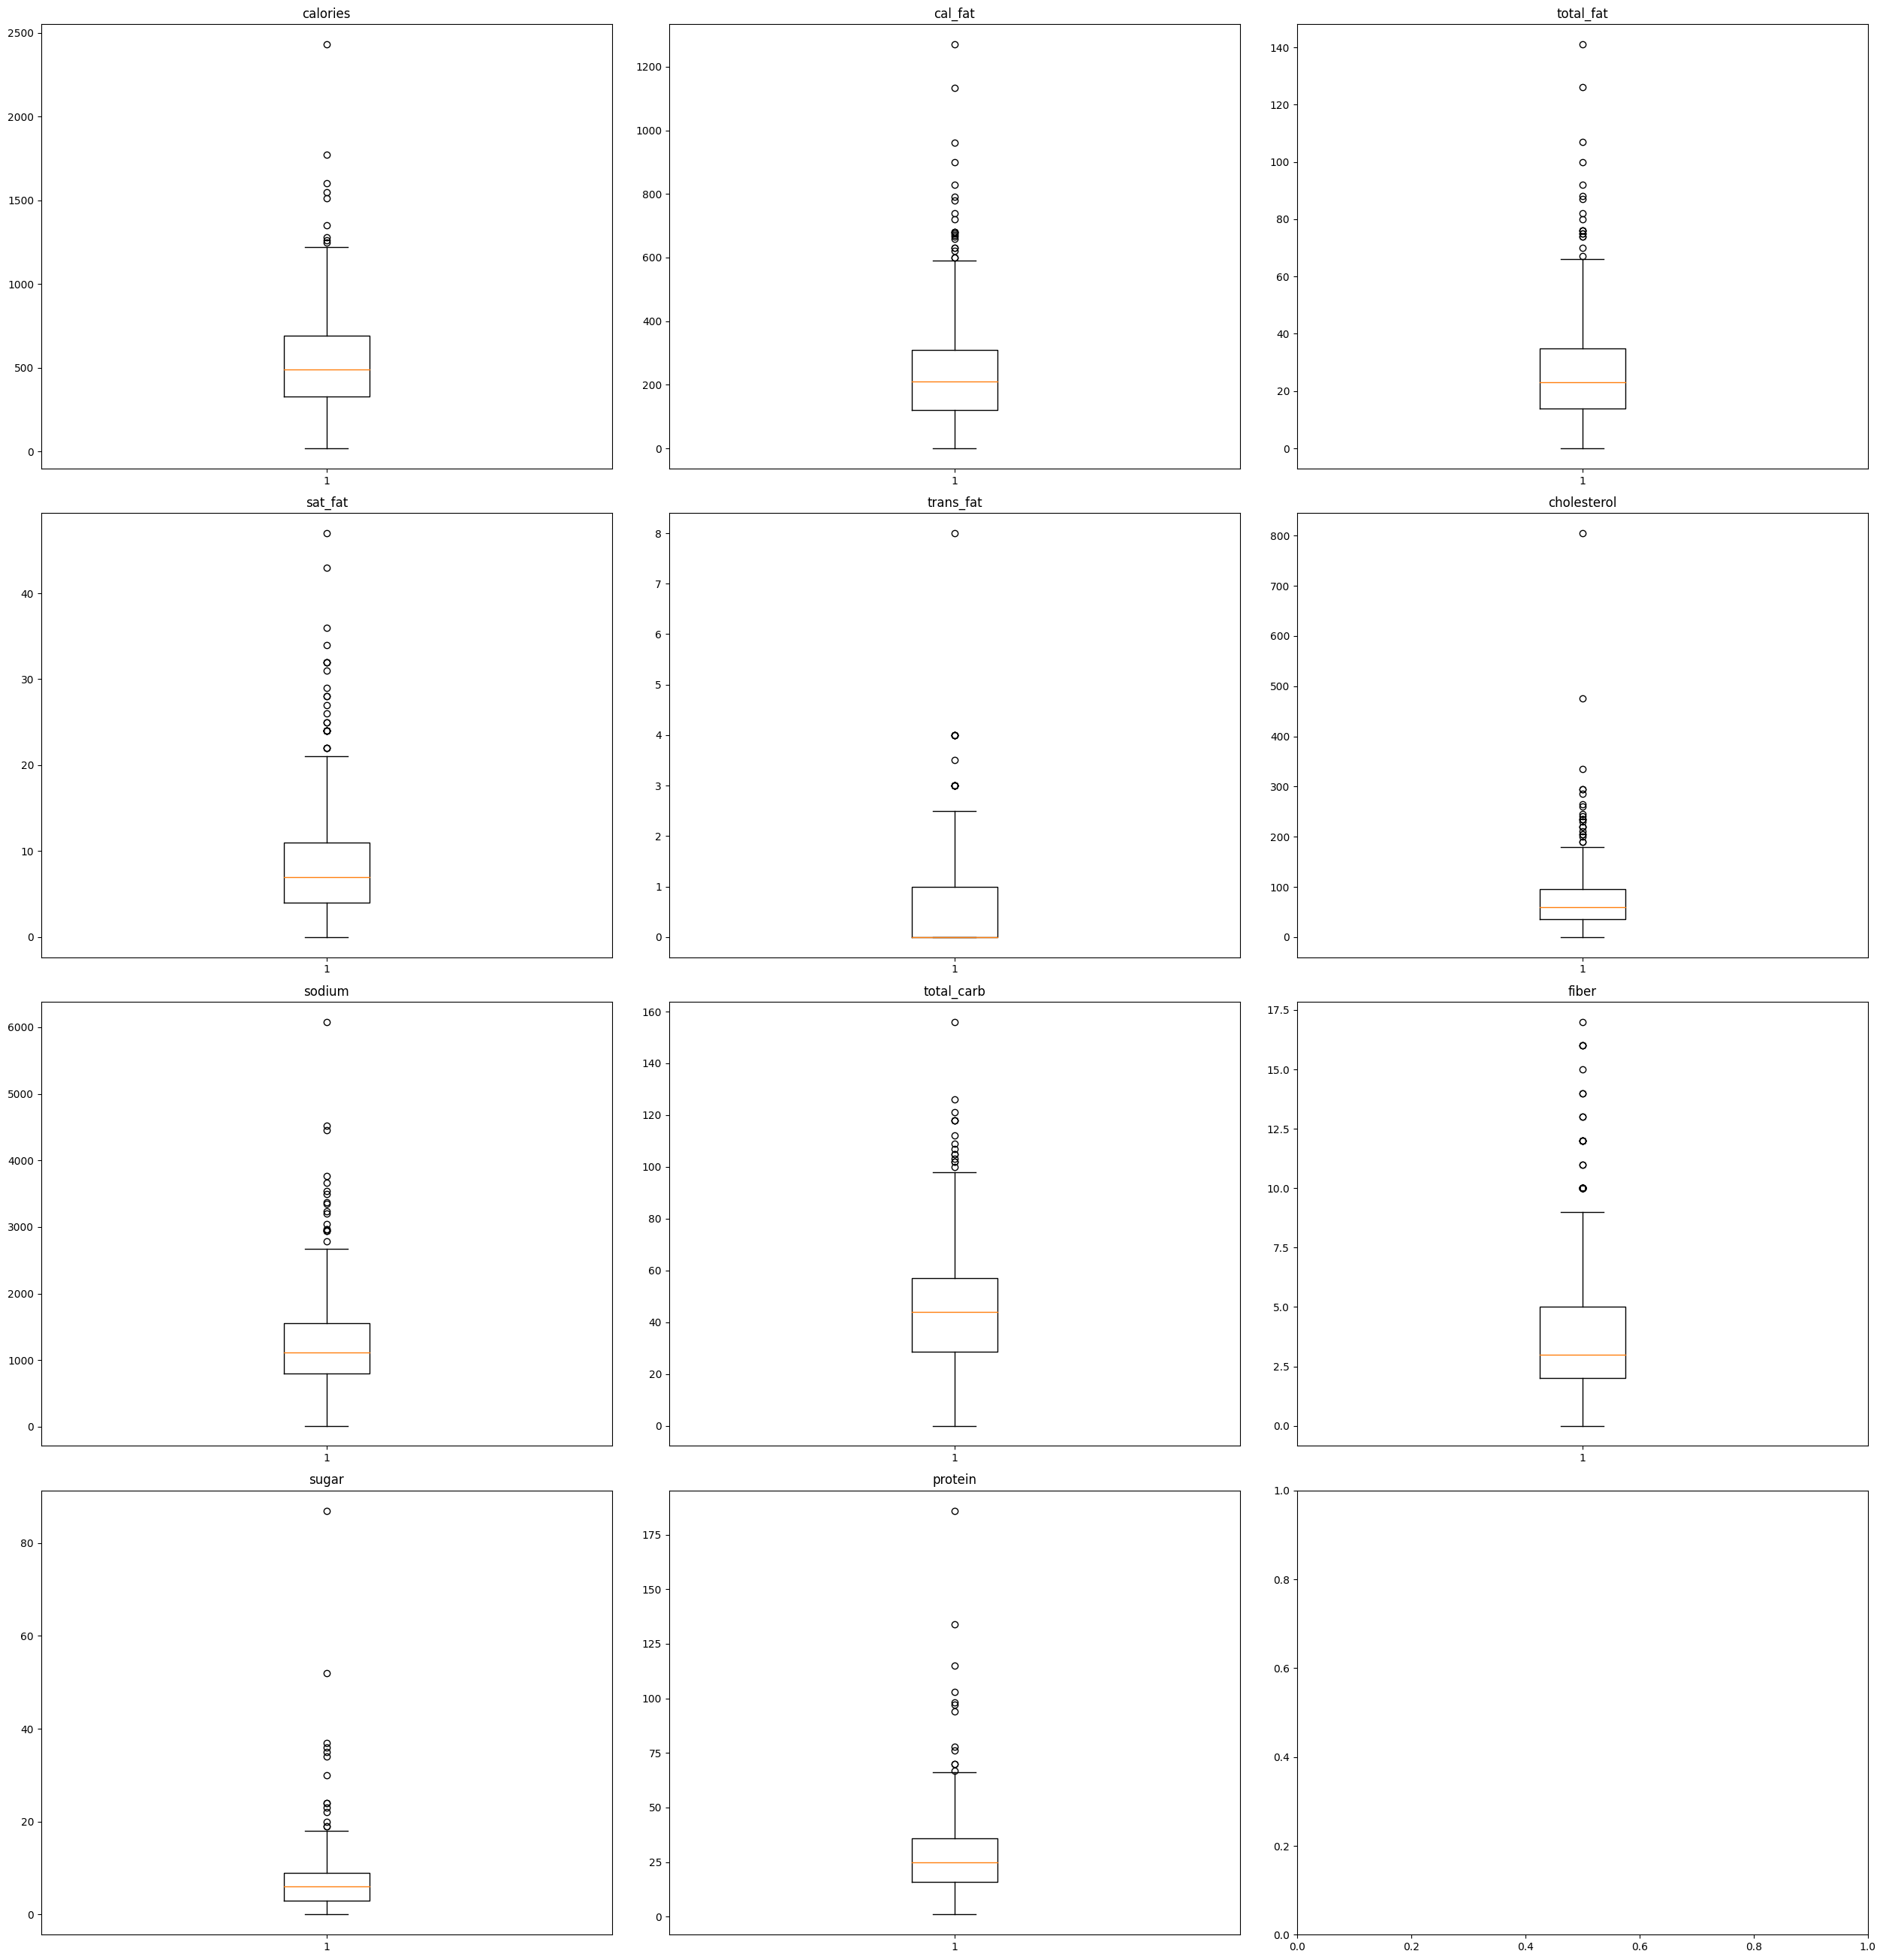

In [10]:
i =  0  ; j = 0 
_ , axs = plt.subplots(4 , 3)
plt.subplots_adjust(left=1.2,
                    bottom=1.7,
                    right=5,
                    top=7,
                    wspace=0.1,
                    hspace=0.1
                    )
for num_col in (numeric_cols):
    axs[i , j].set_title(num_col)
    axs[i , j].boxplot(df[num_col]) 
    j+=1
    if(j > 2 ):
        j = 0
        i+=1      
plt.show()

In [11]:
df[df['calories']> 1300].item.shape  , df[df['calories']> 1300].protein ,df[df['calories']> 1300].item

((6,),
 38     115.0
 39     186.0
 44      98.0
 47      97.0
 115     23.0
 192    134.0
 Name: protein, dtype: float64,
 38           12 piece Buttermilk Crispy Chicken Tenders
 39           20 piece Buttermilk Crispy Chicken Tenders
 44                           40 piece Chicken McNuggets
 47     10 piece Sweet N' Spicy Honey BBQ Glazed Tenders
 115    Garlic Parmesan Dunked Ultimate Chicken Sandwich
 192                             American Brewhouse King
 Name: item, dtype: object)

In [12]:
df[df['calories']> 1300]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,790,88,15.0,1.0,295,3770,64,1.0,2,115.0,Other
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0,Other
44,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0,Other
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,10.0,0.0,265,4450,156,5.0,87,97.0,Other
115,Sonic,Garlic Parmesan Dunked Ultimate Chicken Sandwich,1350,900,100,17.0,0.0,190,2180,69,4.0,10,23.0,Other
192,Burger King,American Brewhouse King,1550,1134,126,47.0,8.0,805,1820,21,3.0,7,134.0,Other


* We can conclude from business understanding that those outliers in macros data could be remain as there are meals contain too much bad nutrition facts. 

Droping Salad column as it filled by only one value (Other)

In [13]:
df.drop('salad' , axis = 1 , inplace= True)
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0


# Visualization

How many restaurant in the data and what is there percentage?

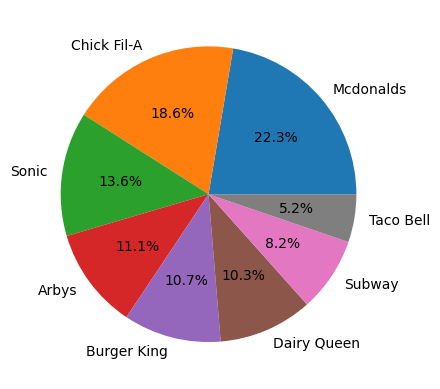

In [14]:
plt.pie(df['restaurant'].value_counts() ,
         labels=list(df['restaurant'].unique())
         ,autopct='%1.1f%%')
# plt.legend()
plt.show()

In [15]:
restaurants =  px.pie(df , 
         names=list(df ['restaurant'].unique()) ,
             values= list(df['restaurant'].value_counts()) ,
            #  color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab","#29b09d","#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"],
)
restaurants.show()

* **How many calories in each item?**

In [16]:
item_his = px.histogram(df , x= 'item' , y = 'calories' , color = 'item',
                        # color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab","#29b09d","#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"],
                        )
item_his.show()

As we can see that the chart can not give us usefull insights due to complexity.

**We can sort data by calories and plot the highest 10 items**

In [17]:
df.sort_values(by= 'calories' , ascending= False , inplace = True , ignore_index= True)
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0
1,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0
2,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,10.0,0.0,265,4450,156,5.0,87,97.0
3,Burger King,American Brewhouse King,1550,1134,126,47.0,8.0,805,1820,21,3.0,7,134.0
4,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,790,88,15.0,1.0,295,3770,64,1.0,2,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Sonic,Ultimate Chicken Club,100,580,64,15.0,0.5,100,2070,65,4.0,12,39.0
511,Chick Fil-A,4 Piece Grilled Chicken Nuggets,70,18,2,1.0,0.0,35,220,1,0.0,0,13.0
512,Arbys,Chopped Side Salad,70,45,5,2.5,0.0,15,100,4,1.0,2,5.0
513,Subway,Veggie Delite Salad,50,10,1,0.0,0.0,0,65,9,4.0,4,3.0


In [18]:
top10_item = df.head(10)
top10_item

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0
1,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0
2,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,10.0,0.0,265,4450,156,5.0,87,97.0
3,Burger King,American Brewhouse King,1550,1134,126,47.0,8.0,805,1820,21,3.0,7,134.0
4,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,790,88,15.0,1.0,295,3770,64,1.0,2,115.0
5,Sonic,Garlic Parmesan Dunked Ultimate Chicken Sandwich,1350,900,100,17.0,0.0,190,2180,69,4.0,10,23.0
6,Sonic,Super Sonic Bacon Double Cheeseburger (w/mayo),1280,830,92,36.0,4.0,260,1630,44,2.0,7,67.0
7,Dairy Queen,6 Piece Chicken Strip Basket w/ Country Gravy,1260,590,66,11.0,1.0,120,3500,121,12.0,4,49.0
8,Burger King,Rodeo King,1250,738,82,31.0,3.5,230,2270,69,3.0,14,60.0
9,Sonic,Super Sonic Double Cheeseburger W/ Mayo,1220,780,87,34.0,4.0,245,1520,45,2.0,8,63.0


In [19]:
top_cal_items = px.histogram(top10_item , x = 'item' , y = 'calories' , color = 'restaurant',title='Calories in each item',
                            #  color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab","#29b09d",
                            #                           "#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"]
                                                      ).update_xaxes(categoryorder= 'total descending')
top_cal_items.show()

* **What about the protein for each top 10 calories' item?**

In [20]:
top_prot_items = px.bar(top10_item , y = 'protein' , x = 'item' , color ='restaurant',title='Protein in each item',
                        # color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab","#29b09d",
                        #                          "#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"]
                                                 ).update_xaxes(categoryorder = 'total descending')
top_prot_items.show()

In [21]:
top_fats_items = px.bar(top10_item , y ='total_fat' , x = 'item' , color = 'restaurant',title='Fats in each item',
                        # color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab","#29b09d",
                        #                          "#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"]
                                                 ).update_xaxes(categoryorder = 'total descending')
top_fats_items.show()

<img src="https://www.barleyandsage.com/wp-content/uploads/2022/03/buttermilk-chicken-tenders-0228.jpg" style="height: 500px;  width:500px " />

In [22]:
top_carb_items = px.bar(top10_item , y = 'total_carb' , x = 'item' , color = 'restaurant', title='Carbohydrates in each item',
                        # color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab",
                        #                          "#29b09d","#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"]
                                                 ).update_xaxes(categoryorder = 'total descending')
top_carb_items.show()

<img src="https://hips.hearstapps.com/hmg-prod/images/honey-glazed-tender-1536331170.jpg?crop=1.00xw:0.845xh;0,0.0646xh&resize=1200:*" style="height: 500px;  width:500px "/> 

In [23]:
top_fib_items = px.bar(top10_item , y = 'fiber' , x = 'item' , color ='restaurant', title='Fibers in each item',
                    #    color_discrete_sequence=["#0068c9","#83c9ff","#ff2b2b","#ffabab",
                    #                             "#29b09d","#7defa1","#ff8700","#ffd16a","#6d3fc0","#d5dae5"] 
                                                ).update_xaxes(categoryorder = 'total descending')
top_fib_items.show()

<img src = "https://images.eatthismuch.com/img/447687_NikolusGonzalez_15280521-8768-4482-9aec-9b6e53eea3f1.jpg" style="height: 500px ; weight: 500px">

As we can deduce that amout of food is not an evidence to say that the macros are high.

In [24]:
df['item'].head(10)

0          20 piece Buttermilk Crispy Chicken Tenders
1                          40 piece Chicken McNuggets
2    10 piece Sweet N' Spicy Honey BBQ Glazed Tenders
3                             American Brewhouse King
4          12 piece Buttermilk Crispy Chicken Tenders
5    Garlic Parmesan Dunked Ultimate Chicken Sandwich
6      Super Sonic Bacon Double Cheeseburger (w/mayo)
7       6 Piece Chicken Strip Basket w/ Country Gravy
8                                          Rodeo King
9             Super Sonic Double Cheeseburger W/ Mayo
Name: item, dtype: object

* **We need to know the macros and calories of each meal in the data, this help us the diet type we can go through.**

* **Let us know distribution of each continous number columns**

In [25]:
cal_distplot = ff.create_distplot([list(df['calories'])] , group_labels=['calories'] , bin_size=15 ,
#  show_hist=False
  )
cal_distplot.update_layout(title_text = 'Calories Distribution')
cal_distplot_dash = dcc.Graph(figure= cal_distplot , id = 'cal_displot')
cal_distplot.show()

In [26]:
df['calories'].mean() , df['calories'].median()

(530.9126213592233, 490.0)

      The data calories distribution is a skew-right distrubtion.
      It is a important chart that tell us that large number of meals calories around 490 calories.

In [27]:
cal_fat_dist_plot = ff.create_distplot([list(df['cal_fat'])] , group_labels=['calories_fats'] , bin_size=10)
cal_fat_dist_plot.update_layout(title_text = 'Calories of fats')
cal_fat_dist_plot_dash = dcc.Graph(figure= cal_fat_dist_plot , id = 'cal_fat_dist_plot')
cal_fat_dist_plot.show()

In [28]:
df['cal_fat'].mean() , df['cal_fat'].median()

(238.8135922330097, 210.0)

    The calories of fats distribution is a skew-right distribution.
    The median of this column is about 210 calories.

In [29]:
carb_distPlot = ff.create_distplot([list(df['total_carb'])] , group_labels= ['total_carb'] , bin_size= 3)
carb_distPlot.update_layout(title_text = 'Total Carbohydrates distribution')
carb_distPlot_dash = dcc.Graph(figure= carb_distPlot , id = 'carb_distPlot')
carb_distPlot.show()

In [30]:
df['total_carb'].mean() , df['total_carb'].median()

(45.664077669902916, 44.0)

    The total carbohydates distribution is a skew-right distribution.
    The median of this column is about 44g carbohydrate.

In [31]:
fib_distPlot= ff.create_distplot([list(df['fiber'])] , group_labels= ['Fiber'] , bin_size= 3).update_layout(title_text = 'Fiber distrubtion')
fib_distPlot_dash = dcc.Graph(figure= fib_distPlot , id = 'fib_distPlot')
fib_distPlot.show()

In [32]:
df['fiber'].mean() , df['fiber'].median()

(4.13717693836978, 3.0)

    As we can see that fiber column also is skew-right distribution.
    Also we can say that the median of the column of fibers discribtion around 3.

* **Finally, we will plot sugar column to ensure that columns distribution is almost right-skew distribution.**  

In [33]:
sugar_distPlot= ff.create_distplot([list(df['sugar'])] , group_labels= ['Sugar'] , bin_size= 1.0).update_layout(title_text = 'Sugar distrubtion')
sugar_distPlot_dash = dcc.Graph(figure= sugar_distPlot , id = 'sugar_distPlot')
sugar_distPlot.show()

In [34]:
df['sugar'].mean(),  df['sugar'].median()

(7.262135922330097, 6.0)

    Also sugar column distribution is skew-right distribution.
    The median of sugar column is 6.

In [35]:
chol_distPlot= ff.create_distplot([list(df['cholesterol'])] , group_labels= ['cholesterol'] , bin_size= 1.0).update_layout(title_text = 'Cholesterol distrubtion')
chol_distPlot_dash = dcc.Graph(figure= chol_distPlot , id = 'chol_distPlot')
fib_distPlot.show()

In [36]:
df['cholesterol'].mean() , df['cholesterol'].median()

(72.45631067961165, 60.0)

    The chlesterol column distribution is skew-right distribution.
    The median of the column is 60

In [37]:
df['restaurant'].unique()

array(['Mcdonalds', 'Burger King', 'Sonic', 'Dairy Queen', 'Subway',
       'Arbys', 'Chick Fil-A', 'Taco Bell'], dtype=object)

* **Based on the chart provided, it seems that the majority of meals are not particularly hazardous (which may occur once every three months or once a month), We should be cautious about our dietary habits when indulging in a cheat meal.**

In [38]:
checkList_opt = df['restaurant'].unique().tolist()
min_slider =df['calories'].min()
max_slider = df['calories'].max()
min_prot = df['protein'].min()
max_prot = df['protein'].max()

top_cal_items_dash = dcc.Graph(
    id = 'top_cal_items' ,
    figure=top_cal_items ,
)
top_fib_items_dash = dcc.Graph(
    id = 'top_fib_items',
    figure= top_fats_items ,
)
top_carb_items_dash = dcc.Graph(
    id = 'top_carb_items',
    figure= top_carb_items , 
)
top_fats_items_dash = dcc.Graph(
 id ='top_fats_items',
 figure=top_fats_items ,
 )
top_prot_items_dash = dcc.Graph(
    id = 'top_prot_items',
    figure= top_prot_items , 
)

range_Silder = dcc.RangeSlider(min= min_slider , max = max_slider , 
                    tooltip={"placement": "bottom", "always_visible": True}, 
                    marks={
                            20: {'label': f'{min_slider}', 'style': {'color': '#77b0b1'}},
                            500: {'label': '500'},
                            1000: {'label': '1000'},
                            2430: {'label': '2430', 'style': {'color': '#f50'}}
                        } 
                        ,value=[min_slider , max_slider], id='calories_range_slider')
range_slider_prot = dcc.RangeSlider(min= min_prot , max = max_prot , 
                    tooltip={"placement": "bottom", "always_visible": True}, 
                    marks={
                            min_prot: {'label': f'{min_prot}', 'style': {'color': '#77b0b1'}},
                            max_prot: {'label': f'{max_prot}', 'style': {'color': '#f50'}}
                        } , value=[min_prot , max_prot] , id='Protein_range_slider')
checklist = dcc.Checklist(
                    options=checkList_opt,
                    value=checkList_opt,
                    style={"color":'#b4543ae6'} , 
                    id = 'restaurant_checklist')

app = Dash(__name__)
app = JupyterDash('Basic Dash Dashboard', 
                  external_stylesheets=[dbc.themes.BOOTSTRAP], 
                  title="Plotly Tips Dashboard"
)
app.layout = dbc.Container([
   dbc.Row(
       [
           dbc.Col(html.H1('Filter for top 10 items with macros' , style={"color":'#6c4646'}))
       ] , className='my-2'
    )
    ,dbc.Row([  
            dbc.Col(html.H4('Calories needed to intake' , style={"color":'#680707'})),
            dbc.Col(dbc.Card(range_Silder)),
            dbc.Col(html.H4('Protein needed to intake' ,style={"color":'#680707'})) ,
            dbc.Col(dbc.Card(range_slider_prot))
            ,dbc.Col(html.H4('Restaurants Wanted to filter items' , style={"color":'#680707'})),
            dbc.Col(dbc.Card(checklist)), 
        ] , className='my-3'), 
        dbc.Row([
            dbc.Col(dbc.Card(top_cal_items_dash , ) , width= 12), 
        ]),
        dbc.Row([
            dbc.Col(dbc.Card(top_carb_items_dash , ), width= 4),
            dbc.Col(dbc.Card(top_prot_items_dash , ) , width= 4), 
            dbc.Col(dbc.Card(top_fats_items_dash), width= 4)
        ], className='my-4'), 
])
@app.callback(
    [Output(component_id='top_cal_items'  , component_property='figure'),
     Output(component_id='top_prot_items' , component_property='figure'), 
     Output(component_id='top_carb_items' , component_property='figure') , 
     Output(component_id='top_fats_items' ,component_property='figure')
     ],
    [Input(component_id='restaurant_checklist' , component_property= 'value'),
     Input(component_id='calories_range_slider' , component_property='value'),
     Input(component_id='Protein_range_slider' , component_property='value') 
     ],
     prevent_initial_call = True
)
def func(lst , val , prot_val):
    val = list(val) ; lst = list(lst) ; prot_val = list(prot_val)
    if (lst == df['restaurant'].unique().tolist()) & ((val[0] == 20) & (val[1] == 2430)) & ((prot_val[1] == 186)& (prot_val[0] == 1)):
         print(val , '\n',val , '\n' ,prot_val ,'\n', lst)   
         return [top_cal_items , top_prot_items , top_carb_items , top_fats_items]
    print(val , '\n',val , '\n' ,prot_val ,'\n', lst)   
    filtered_df = df[df['restaurant'].isin(lst) & ((df['calories']>= val[0]) & (df['calories']<= val[1]))& ((df['protein']>= prot_val[0]) & (df['protein']<= prot_val[1]))]
    filtered_df.sort_values(by= 'calories' , ascending= False , inplace = True , ignore_index= True)
    top10_items_new = filtered_df.head(10)
    top_cal_items_new = px.histogram(top10_items_new,
                                      x = 'item' , y = 'calories' ,
                                     color = 'restaurant',title='Calories in each item').update_xaxes(categoryorder= 'total descending')
    top_prot_items_new = px.histogram(top10_items_new , x = 'item' , y='protein' ,
                                       color='restaurant' , title = 'Protein in each item').update_xaxes(categoryorder = 'total descending')
    top_carb_items_new = px.histogram(top10_items_new , x = 'item' , y='total_carb' ,
                                       color='restaurant' , title = 'Carb in each item').update_xaxes(categoryorder = 'total descending')
    top_fats_items_new = px.histogram(top10_items_new , x = 'item' , y='total_fat' ,
                                       color='restaurant' , title = 'Fats in each item').update_xaxes(categoryorder = 'total descending')
    return [top_cal_items_new , top_prot_items_new , top_carb_items_new , top_fats_items_new]

if __name__ == '__main__':
      app.run_server(debug = True)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dash\dash.py:516: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on http://127.0.0.1:8050/


In [39]:
lst = ['Mcdonalds' , 'Burger King'] ; val = [960 , 1840]
filtered_df = df[df['restaurant'].isin(lst) & ((df['calories']>= val[0]) & (df['calories']<=val[1]))]
filtered_df.sort_values(by= 'calories' , ascending= False , inplace = True , ignore_index= True)
top10_items_new = filtered_df.head(10)
top_cal_items_new = px.histogram(top10_items_new,
                                    x = 'item' , y = 'calories' ,
                                    color = 'restaurant',title='Calories in each item').update_xaxes(categoryorder= 'total descending')
top_cal_items_new.show()

In [40]:
df['protein'].max() , df['protein'].min()

(186.0, 1.0)